In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [29]:
forest_data=pd.read_csv("forestfires (1).csv")

# EDA and data visualization

In [30]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [31]:
forest_data["size_category"].unique()

array(['small', 'large'], dtype=object)

In [32]:
data=forest_data.iloc[:,0:11]
data=pd.concat([data,forest_data["size_category"]],axis=1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [34]:
data.shape

(517, 12)

In [35]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [36]:
data=data.dropna()

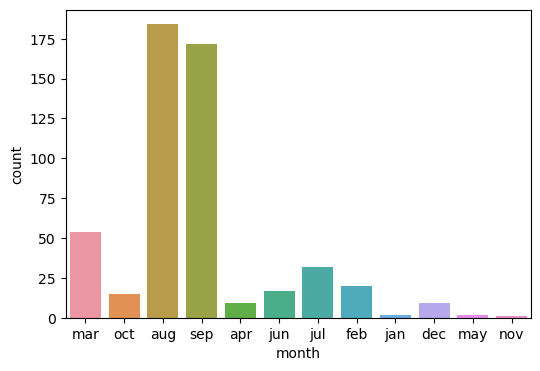

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data["month"])
plt.show()

In [38]:
label=LabelEncoder()
for i in data.columns:
    if(type(data[i][1]==str)):
        data[i]=label.fit_transform(data[i])

In [39]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,28,37,41,29,12,34,14,0,0,1
1,10,5,56,49,144,42,85,16,1,0,0,1
2,10,2,56,56,156,42,55,16,2,0,0,1
3,7,0,67,48,33,64,13,72,8,1,0,1
4,7,3,46,66,46,68,30,73,3,0,0,1


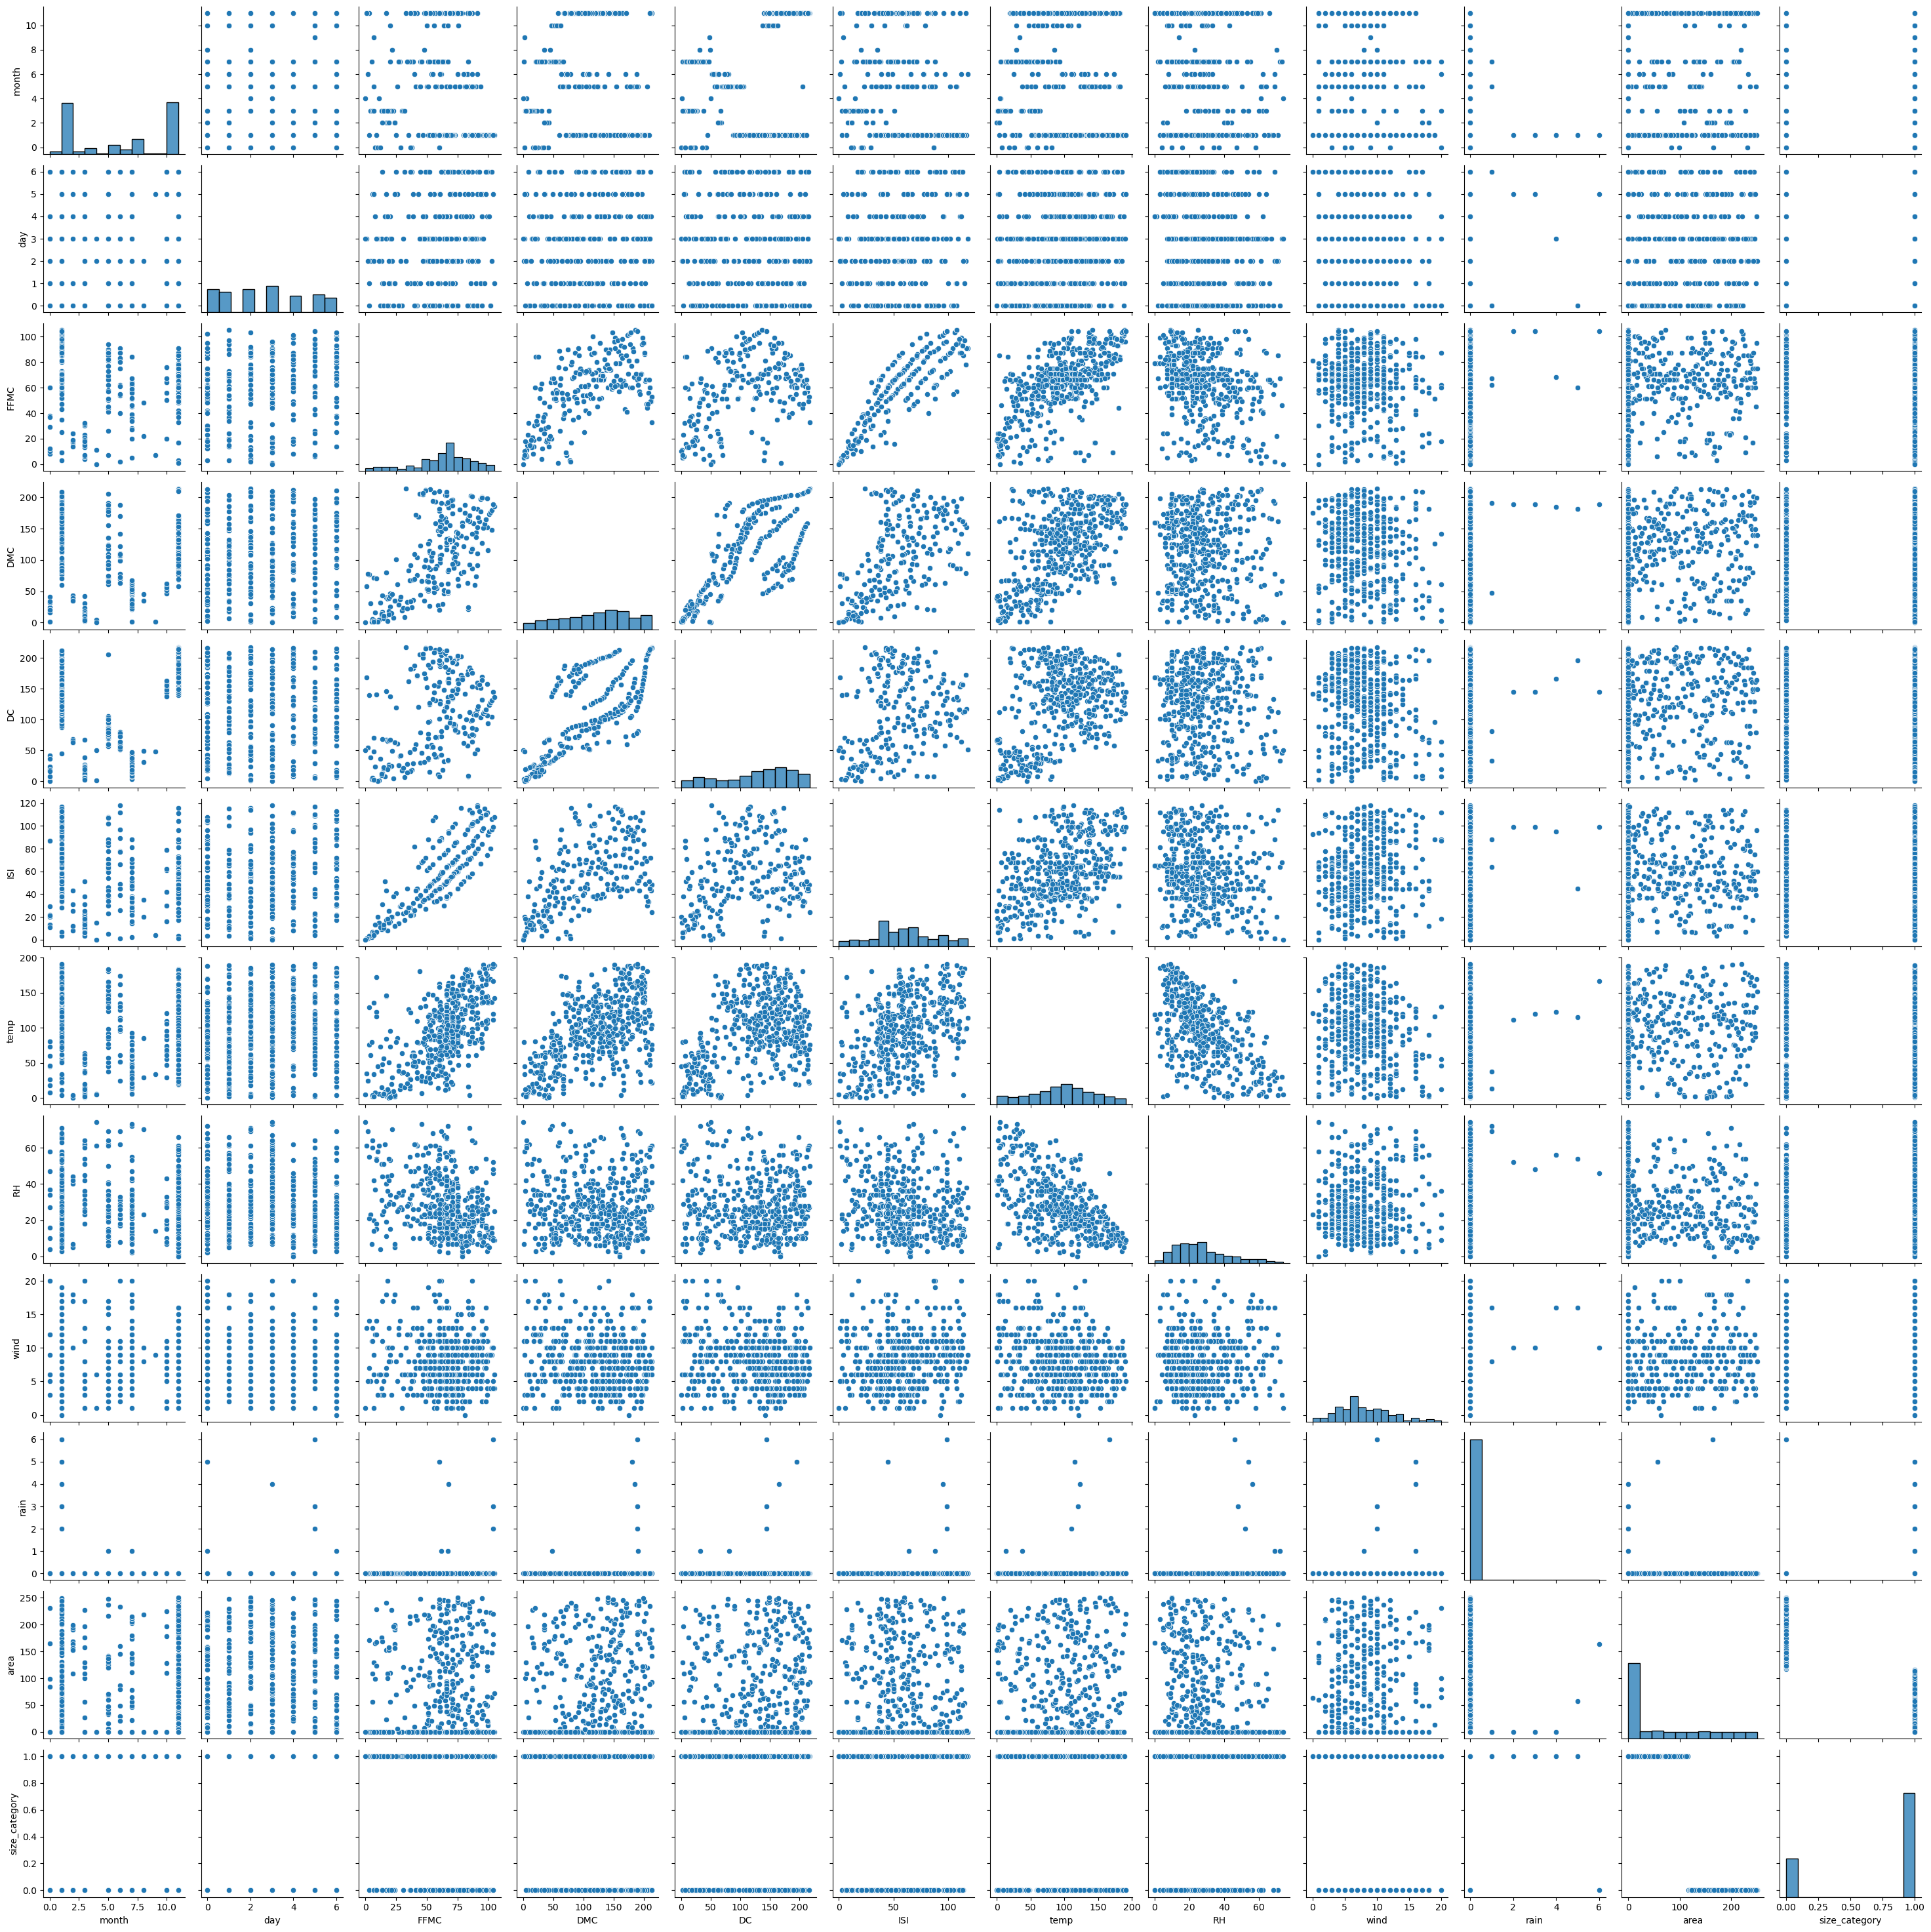

In [13]:
sns.pairplot(data)

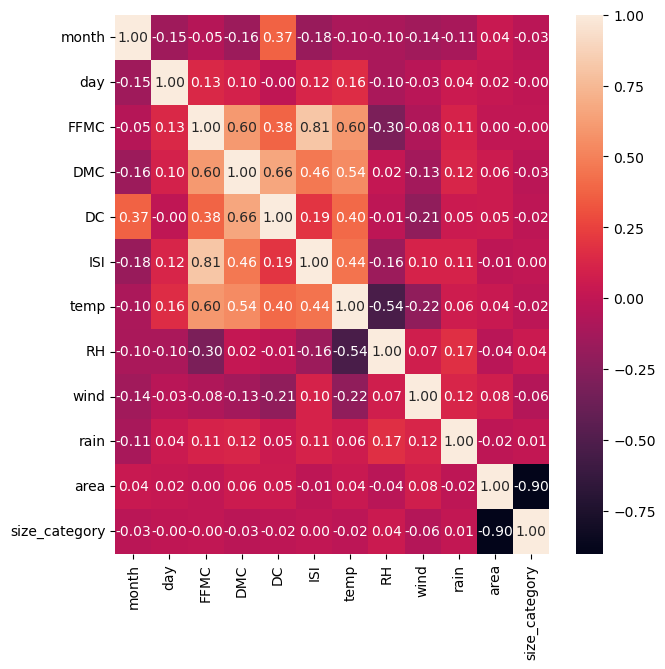

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,fmt="0.2f")
plt.show()

In [40]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,28,37,41,29,12,34,14,0,0,1
1,10,5,56,49,144,42,85,16,1,0,0,1
2,10,2,56,56,156,42,55,16,2,0,0,1
3,7,0,67,48,33,64,13,72,8,1,0,1
4,7,3,46,66,46,68,30,73,3,0,0,1


In [41]:
x=data.iloc[:,0:10]
y=data.iloc[:,-1]

In [42]:
y.shape

(517,)

In [43]:
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,0,28,37,41,29,12,34,14,0
1,10,5,56,49,144,42,85,16,1,0
2,10,2,56,56,156,42,55,16,2,0
3,7,0,67,48,33,64,13,72,8,1
4,7,3,46,66,46,68,30,73,3,0


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# model building

In [52]:
model=SVC(kernel="rbf")
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.85       130

    accuracy                           0.75       130
   macro avg       0.50      0.37      0.43       130
weighted avg       1.00      0.75      0.85       130



# Grid Search for finding the best values

In [45]:
model=SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001,0.000001],'C':[1,15,14,13,12,50,11,10,0.1] }]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 50, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05,
                                    1e-06],
                          'kernel': ['rbf']}])

In [46]:
gsv.best_params_,gsv.best_score_

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7261808367071525)

In [47]:
model=SVC(C= 1, gamma= 0.0001, kernel= 'rbf')
model.fit(x_train,y_train)

SVC(C=1, gamma=0.0001)

In [48]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.75      1.00      0.85        97

    accuracy                           0.75       130
   macro avg       0.37      0.50      0.43       130
weighted avg       0.56      0.75      0.64       130



In [49]:
print("confusion_matrix\n",confusion_matrix(pred,y_test))

confusion_matrix
 [[ 0  0]
 [33 97]]
